# Instagram Data Analysis
#### Dataset from Kaggle: kaggle/datasets/bhanupratapbiswas/instagram-reach-analysis-case-study

#### The dataset contains the information regarding the impressions to hashtags that can be used to derive valuable insights and visualize it. In this project, I am performing EDA on this dataset.

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/raghunandanms/Documents/python_codes/Data Sets/Instagram_data.csv', encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [82]:
print(f'Number of Rows: {df.shape[0]} and Number of Cols: {df.shape[1]}')

Number of Rows: 119 and Number of Cols: 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
df.dtypes

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

In [7]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


In [11]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [12]:
for_corr = ['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows']
df_for_corr = df[for_corr]
df[for_corr].corr()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152


In [17]:
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares'] / df['Impressions'])
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,171.001276
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,231.002595
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,142.000249
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,223.001546
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,128.001589


In [132]:
df['CTR'] = (df['Saves'] + df['Comments'] + df['Shares'] + df['Likes'] + df['Profile Visits'] + df['Follows']) / df['Impressions']

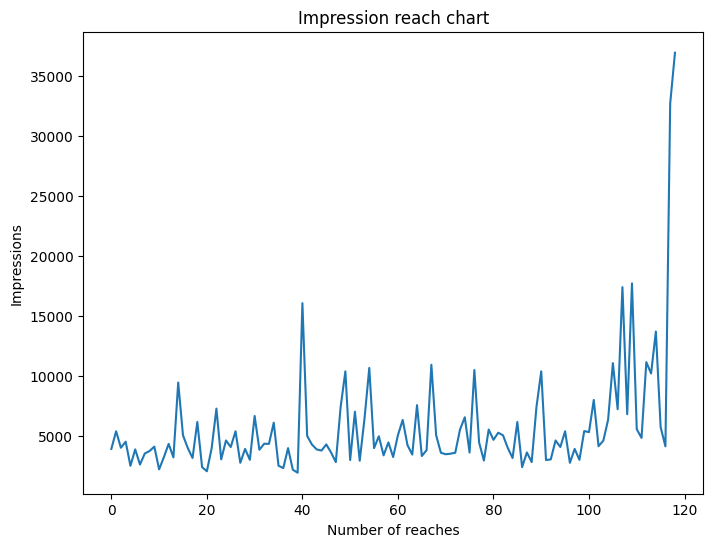

In [21]:
plt.figure(figsize=(8,6))
sns.lineplot(x = df.index, y=df['Impressions'])
plt.title('Impression reach chart')
plt.xlabel('Number of reaches')
plt.ylabel('Impressions')
plt.show()

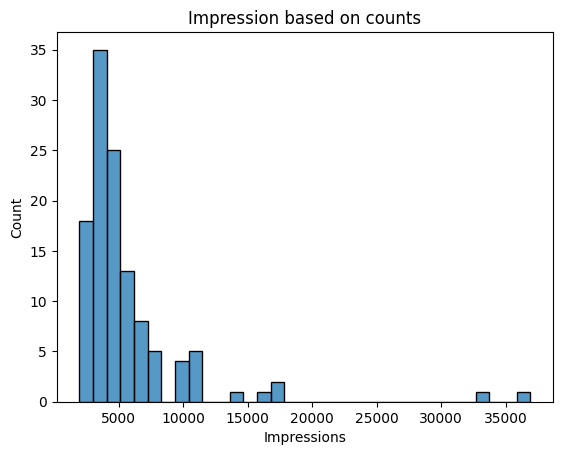

In [23]:
plt.title('Impression based on counts')
sns.histplot(data=df, x='Impressions')
plt.show()

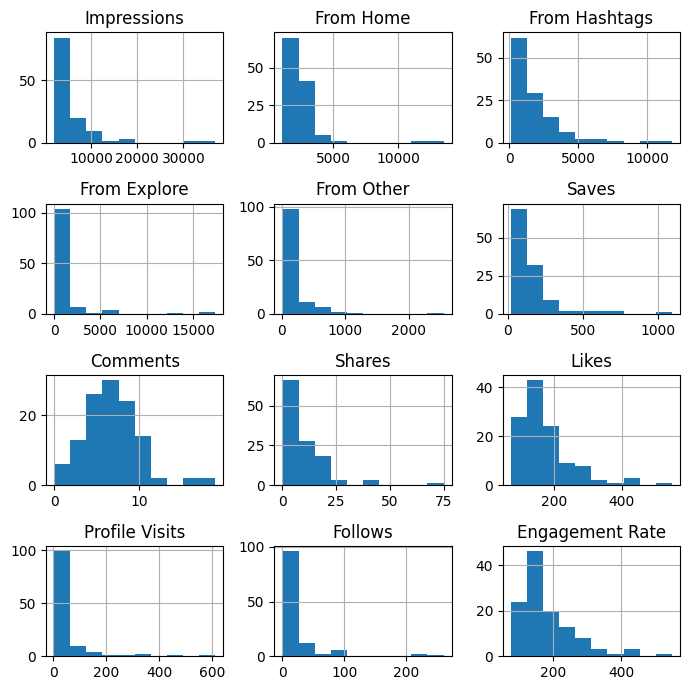

In [38]:
df.hist(figsize=(7, 7))
plt.tight_layout()
plt.show()

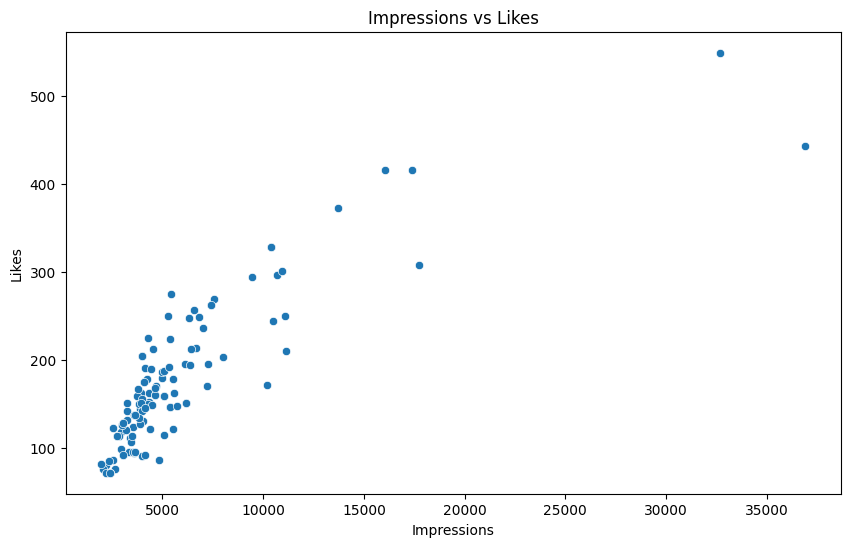

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Likes', data=df)
plt.xlabel('Impressions')
plt.ylabel('Likes')
plt.title('Impressions vs Likes');

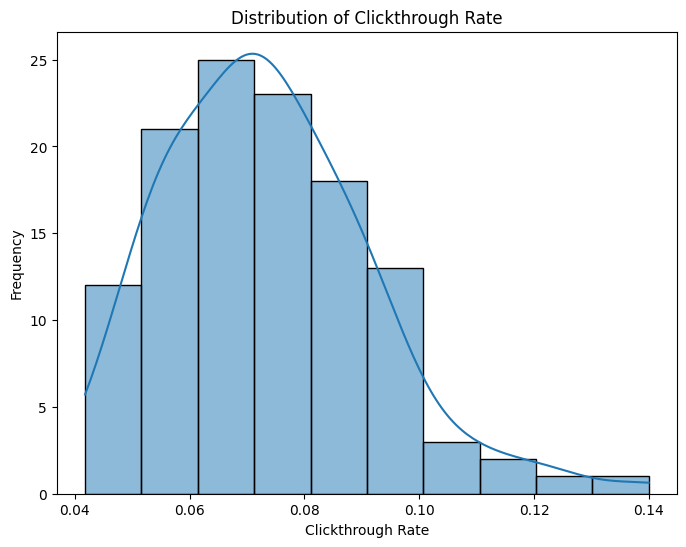

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CTR'], kde=True)
plt.xlabel('Clickthrough Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Clickthrough Rate')
plt.show()

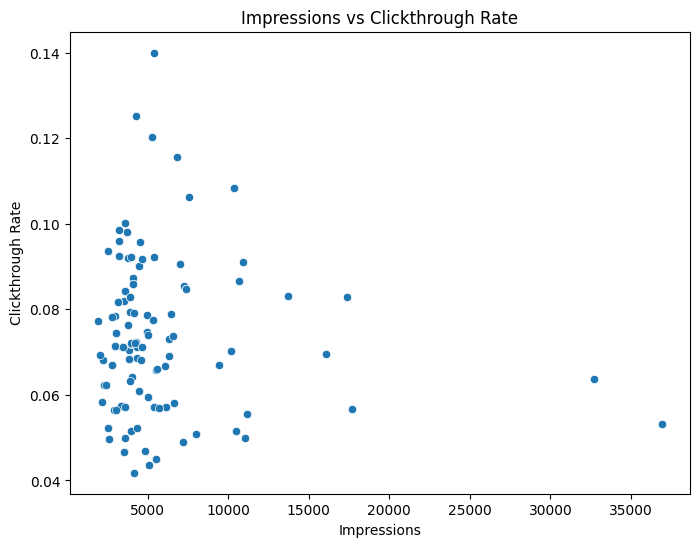

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Impressions', y='CTR', data=df)
plt.xlabel('Impressions')
plt.ylabel('Clickthrough Rate')
plt.title('Impressions vs Clickthrough Rate')
plt.show()

In [50]:
ctr_thresholds = [0.01, 0.05, 0.1, 0.15, 0.2]
for threshold in ctr_thresholds:
    ctr_segment = df[df['CTR'] >= threshold]
    print(f"Samples with CTR >= {threshold}: {len(ctr_segment)}")
    # Perform further analysis on the segmented data

Samples with CTR >= 0.01: 119
Samples with CTR >= 0.05: 110
Samples with CTR >= 0.1: 8
Samples with CTR >= 0.15: 0
Samples with CTR >= 0.2: 0


In [51]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate', 'CTR'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

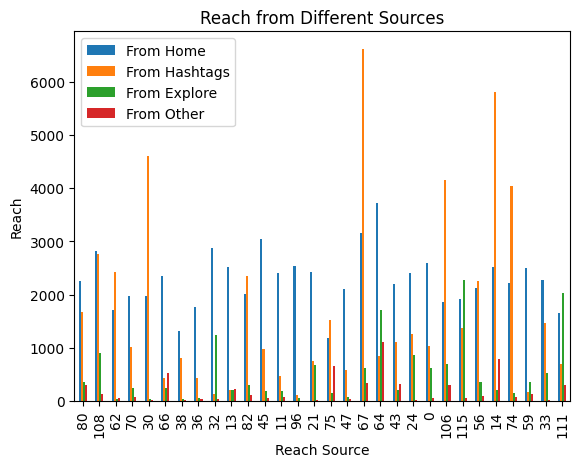

In [64]:
df1 = df.sample(frac=.25)
# Create the bar chart
plt.figure(figsize=(10, 6))
df1[['From Home', 'From Hashtags', 'From Explore', 'From Other']].plot(kind='bar')
plt.xlabel('Reach Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.legend()
plt.show()

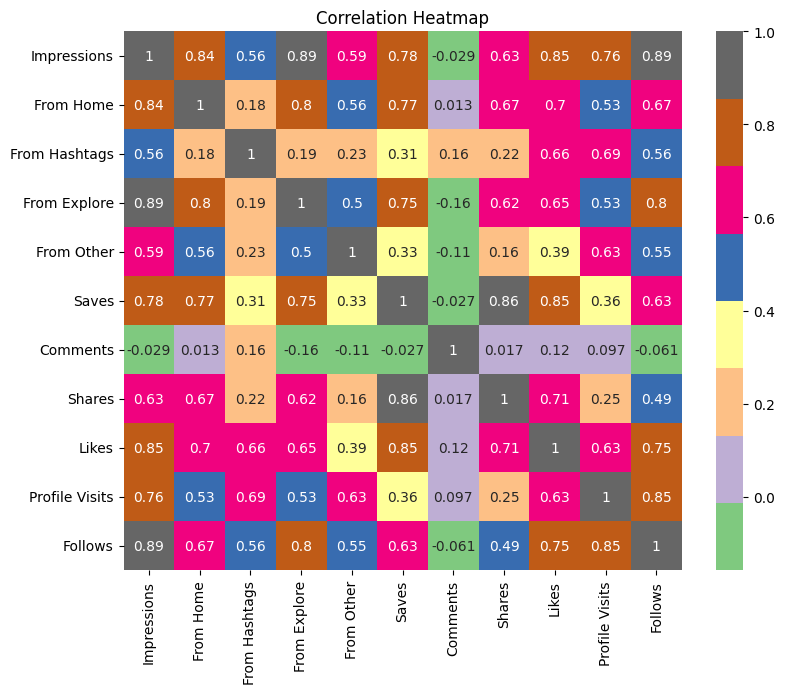

In [69]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_for_corr.corr(), annot=True, cmap='Accent', fmt='.2g')
plt.title('Correlation Heatmap')
plt.show()

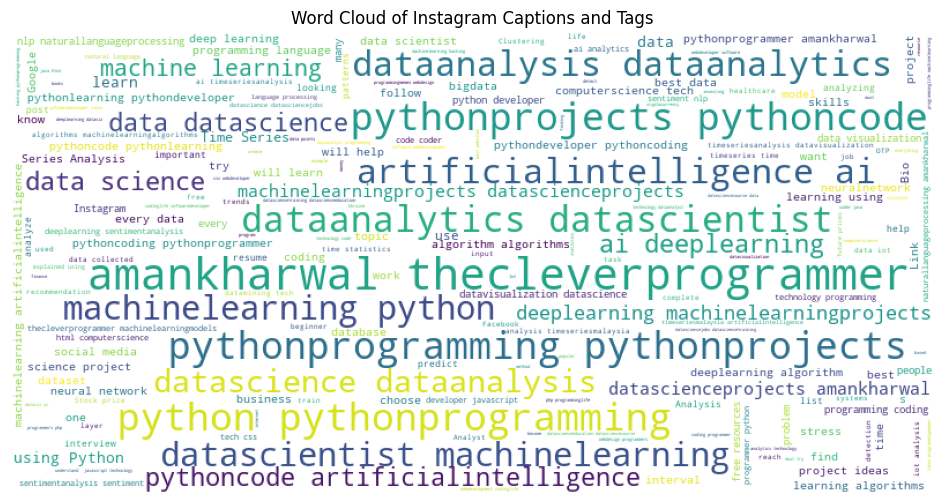

In [79]:
from wordcloud import WordCloud, STOPWORDS
# Concatenate the text columns
text = ' '.join(df['Caption'] + ' ' + df['Hashtags'])

# Create the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Instagram Captions and Tags')
plt.show()

In [83]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement Rate,CTR
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,171.001276,0.079337
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,231.002595,0.092139
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,142.000249,0.064163
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,223.001546,0.095627
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,128.001589,0.093725


In [98]:
data = df[['Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]

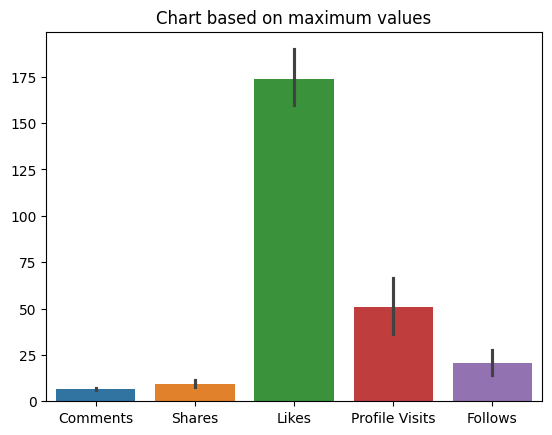

In [100]:
plt.title('Chart based on maximum values')
sns.barplot(data)
plt.show()

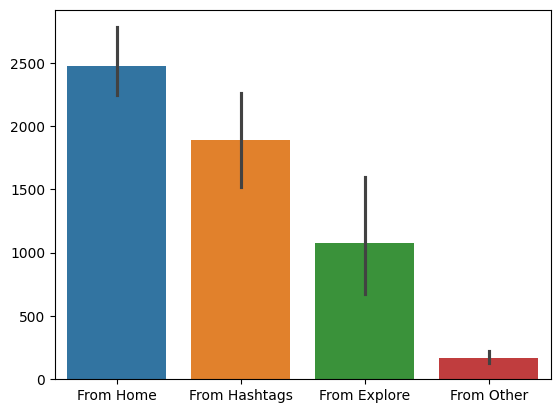

In [129]:
source = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']]
sns.barplot(source)
plt.show()

#### Still more insights can be derived for the better understanding of the data. And also Random Forest algorithm can be used for any predictions for the future.

#### Coded by RMS